In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [37]:
im =  cv2.imread('nucleus.jpeg') # Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(391, 281, 3)


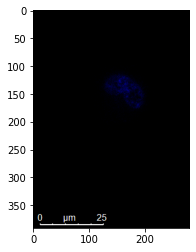

In [38]:
plt.imshow(im) 
plt.show()

In [39]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(109871, 3)


In [40]:
from sklearn.cluster import KMeans
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [41]:
centers = km.cluster_centers_
print(centers) # In RGB Format

[[1.49453491e-02 1.01918474e-13 3.92352591e-01]
 [2.36741688e+02 2.49388747e+02 2.49327366e+02]
 [4.44089210e-15 1.65983380e+00 5.62249307e+01]
 [2.03843373e+02 1.30927711e+02 4.43373494e+01]]


In [42]:
# Convert to Integer format
centers = np.array(centers,dtype='uint8')
print(centers)

[[  0   0   0]
 [236 249 249]
 [  0   1  56]
 [203 130  44]]


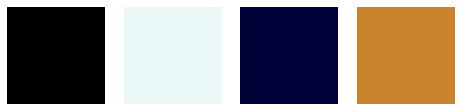

In [43]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [48]:
new_img = np.zeros((391*281,3),dtype='uint8')
print(new_img.shape)

(109871, 3)


In [49]:
colors

[array([0, 0, 0], dtype=uint8),
 array([236, 249, 249], dtype=uint8),
 array([ 0,  1, 56], dtype=uint8),
 array([203, 130,  44], dtype=uint8)]

In [50]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

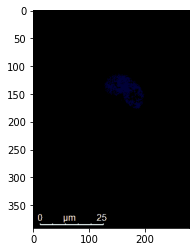

In [51]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()